In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [19]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [20]:
function count_floats(a, b)
           count = 0
           if a > b
               a, b = b, a
           end
           while a < b
               a = nextfloat(a)
               count += 1
           end
           return count
end

count_floats (generic function with 1 method)

In [21]:
t = 1000.0
tt = 500.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [22]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const U0 = 0.3;  const ΔU0 = 0.305;

In [23]:
I0 = -1.4
p =  [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.39353, 0.73803, 0.429055]
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [8.39353, 0.73803, 0.429055]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.4]

In [24]:
count_floats(Float32(-1.40), Float32(-1.87036))

3945666

In [25]:
I0range = range( -1.4, -1.87036, length = 2001 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.75
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-13, atol = 1e-13);

In [26]:
I0range

-1.4:-0.00023518:-1.87036

In [27]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.4
parameter = -1.40023518
parameter = -1.40047036
parameter = -1.40070554
parameter = -1.40094072
parameter = -1.4011759
parameter = -1.40141108
parameter = -1.40164626
parameter = -1.40188144
parameter = -1.40211662
parameter = -1.4023518
parameter = -1.40258698
parameter = -1.40282216
parameter = -1.40305734
parameter = -1.40329252
parameter = -1.4035277
parameter = -1.40376288
parameter = -1.40399806
parameter = -1.40423324
parameter = -1.40446842
parameter = -1.4047036
parameter = -1.40493878
parameter = -1.40517396
parameter = -1.40540914
parameter = -1.40564432
parameter = -1.4058795
parameter = -1.40611468
parameter = -1.40634986
parameter = -1.40658504
parameter = -1.40682022
parameter = -1.4070554
parameter = -1.40729058
parameter = -1.40752576
parameter = -1.40776094
parameter = -1.40799612
parameter = -1.4082313
parameter = -1.40846648
parameter = -1.40870166
parameter = -1.40893684
parameter = -1.40917202
parameter = -1.4094072
parameter = -1.40964238
paramet

parameter = -1.48090192
parameter = -1.4811371
parameter = -1.48137228
parameter = -1.48160746
parameter = -1.48184264
parameter = -1.48207782
parameter = -1.482313
parameter = -1.48254818
parameter = -1.48278336
parameter = -1.48301854
parameter = -1.48325372
parameter = -1.4834889
parameter = -1.48372408
parameter = -1.48395926
parameter = -1.48419444
parameter = -1.48442962
parameter = -1.4846648
parameter = -1.48489998
parameter = -1.48513516
parameter = -1.48537034
parameter = -1.48560552
parameter = -1.4858407
parameter = -1.48607588
parameter = -1.48631106
parameter = -1.48654624
parameter = -1.48678142
parameter = -1.4870166
parameter = -1.48725178
parameter = -1.48748696
parameter = -1.48772214
parameter = -1.48795732
parameter = -1.4881925
parameter = -1.48842768
parameter = -1.48866286
parameter = -1.48889804
parameter = -1.48913322
parameter = -1.4893684
parameter = -1.48960358
parameter = -1.48983876
parameter = -1.49007394
parameter = -1.49030912
parameter = -1.4905443
pa

parameter = -1.56180384
parameter = -1.56203902
parameter = -1.5622742
parameter = -1.56250938
parameter = -1.56274456
parameter = -1.56297974
parameter = -1.56321492
parameter = -1.5634501
parameter = -1.56368528
parameter = -1.56392046
parameter = -1.56415564
parameter = -1.56439082
parameter = -1.564626
parameter = -1.56486118
parameter = -1.56509636
parameter = -1.56533154
parameter = -1.56556672
parameter = -1.5658019
parameter = -1.56603708
parameter = -1.56627226
parameter = -1.56650744
parameter = -1.56674262
parameter = -1.5669778
parameter = -1.56721298
parameter = -1.56744816
parameter = -1.56768334
parameter = -1.56791852
parameter = -1.5681537
parameter = -1.56838888
parameter = -1.56862406
parameter = -1.56885924
parameter = -1.56909442
parameter = -1.5693296
parameter = -1.56956478
parameter = -1.56979996
parameter = -1.57003514
parameter = -1.57027032
parameter = -1.5705055
parameter = -1.57074068
parameter = -1.57097586
parameter = -1.57121104
parameter = -1.57144622
p

parameter = -1.64270576
parameter = -1.64294094
parameter = -1.64317612
parameter = -1.6434113
parameter = -1.64364648
parameter = -1.64388166
parameter = -1.64411684
parameter = -1.64435202
parameter = -1.6445872
parameter = -1.64482238
parameter = -1.64505756
parameter = -1.64529274
parameter = -1.64552792
parameter = -1.6457631
parameter = -1.64599828
parameter = -1.64623346
parameter = -1.64646864
parameter = -1.64670382
parameter = -1.646939
parameter = -1.64717418
parameter = -1.64740936
parameter = -1.64764454
parameter = -1.64787972
parameter = -1.6481149
parameter = -1.64835008
parameter = -1.64858526
parameter = -1.64882044
parameter = -1.64905562
parameter = -1.6492908
parameter = -1.64952598
parameter = -1.64976116
parameter = -1.64999634
parameter = -1.65023152
parameter = -1.6504667
parameter = -1.65070188
parameter = -1.65093706
parameter = -1.65117224
parameter = -1.65140742
parameter = -1.6516426
parameter = -1.65187778
parameter = -1.65211296
parameter = -1.65234814
p

parameter = -1.72384286
parameter = -1.72407804
parameter = -1.72431322
parameter = -1.7245484
parameter = -1.72478358
parameter = -1.72501876
parameter = -1.72525394
parameter = -1.72548912
parameter = -1.7257243
parameter = -1.72595948
parameter = -1.72619466
parameter = -1.72642984
parameter = -1.72666502
parameter = -1.7269002
parameter = -1.72713538
parameter = -1.72737056
parameter = -1.72760574
parameter = -1.72784092
parameter = -1.7280761
parameter = -1.72831128
parameter = -1.72854646
parameter = -1.72878164
parameter = -1.72901682
parameter = -1.729252
parameter = -1.72948718
parameter = -1.72972236
parameter = -1.72995754
parameter = -1.73019272
parameter = -1.7304279
parameter = -1.73066308
parameter = -1.73089826
parameter = -1.73113344
parameter = -1.73136862
parameter = -1.7316038
parameter = -1.73183898
parameter = -1.73207416
parameter = -1.73230934
parameter = -1.73254452
parameter = -1.7327797
parameter = -1.73301488
parameter = -1.73325006
parameter = -1.73348524
p

parameter = -1.80497996
parameter = -1.80521514
parameter = -1.80545032
parameter = -1.8056855
parameter = -1.80592068
parameter = -1.80615586
parameter = -1.80639104
parameter = -1.80662622
parameter = -1.8068614
parameter = -1.80709658
parameter = -1.80733176
parameter = -1.80756694
parameter = -1.80780212
parameter = -1.8080373
parameter = -1.80827248
parameter = -1.80850766
parameter = -1.80874284
parameter = -1.80897802
parameter = -1.8092132
parameter = -1.80944838
parameter = -1.80968356
parameter = -1.80991874
parameter = -1.81015392
parameter = -1.8103891
parameter = -1.81062428
parameter = -1.81085946
parameter = -1.81109464
parameter = -1.81132982
parameter = -1.811565
parameter = -1.81180018
parameter = -1.81203536
parameter = -1.81227054
parameter = -1.81250572
parameter = -1.8127409
parameter = -1.81297608
parameter = -1.81321126
parameter = -1.81344644
parameter = -1.81368162
parameter = -1.8139168
parameter = -1.81415198
parameter = -1.81438716
parameter = -1.81462234
p

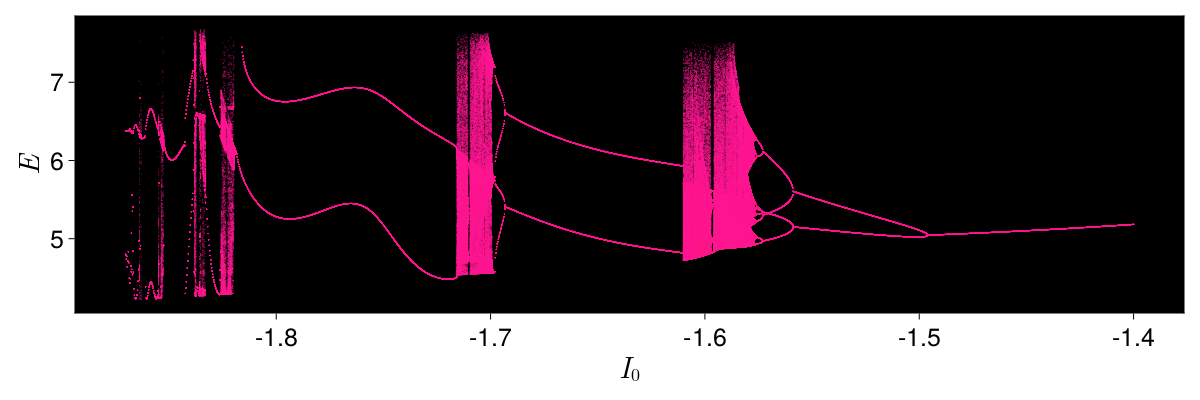

In [28]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25, xgridvisible = false, ygridvisible = false, backgroundcolor = :black)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 1.5)
end
f

In [29]:
save("E_2k_dots_x_076.jld", "data", output)